Análise de Fatura de Cartão de Crédito
* Libs utizadasa: Pandas, matplotlib pylot

In [ ]:
!pip install matplotlib

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [7]:
dados=pd.read_csv('fatura.csv')
dados.head()


,Nome,NumeroCartao,data_compra,hora_compra,categoria,estabelecimento,ValorCompra
0,Ana,4745654042586681,2024-05-08,18:46:33,Vestuário,Loja de Roupas,53.21
1,Carlos,374149440690652,2024-04-22,03:00:47,Farmácia,Loja de Suplementos,159.70
2,Carlos,374149440690652,2024-05-16,22:19:36,Lazer,Show,114.56
3,Maria,374604561384428,2024-05-06,01:13:57,Mercado,Supermercado,101.21
4,Joao,2298930723413634,2024-04-18,02:08:58,Mercado,Mercado,32.03


In [11]:
valor_total_cartao = dados['ValorCompra'].sum()
print(valor_total_cartao)

14811.75


In [14]:
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=True)
valor_gasto_por_titular


,Nome,ValorCompra
2,Joao,2562.15
3,Maria,2784.91
1,Carlos,3701.59
0,Ana,5763.10


In [18]:
valor_gasto_por_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
valor_gasto_por_categoria


,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


In [21]:
gasto_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index()
gasto_por_dia.sort_values(by='ValorCompra', ascending=False)
gasto_por_dia


,data_compra,ValorCompra
0,2024-04-01,455.73
1,2024-04-02,486.65
2,2024-04-03,153.34
3,2024-04-04,239.86
4,2024-04-05,569.11
5,2024-04-07,12.58
6,2024-04-08,54.57
7,2024-04-09,282.02
8,2024-04-10,119.85
9,2024-04-11,220.61


Grafico dos gasto por Titular

Text(0, 0.5, 'Valor')

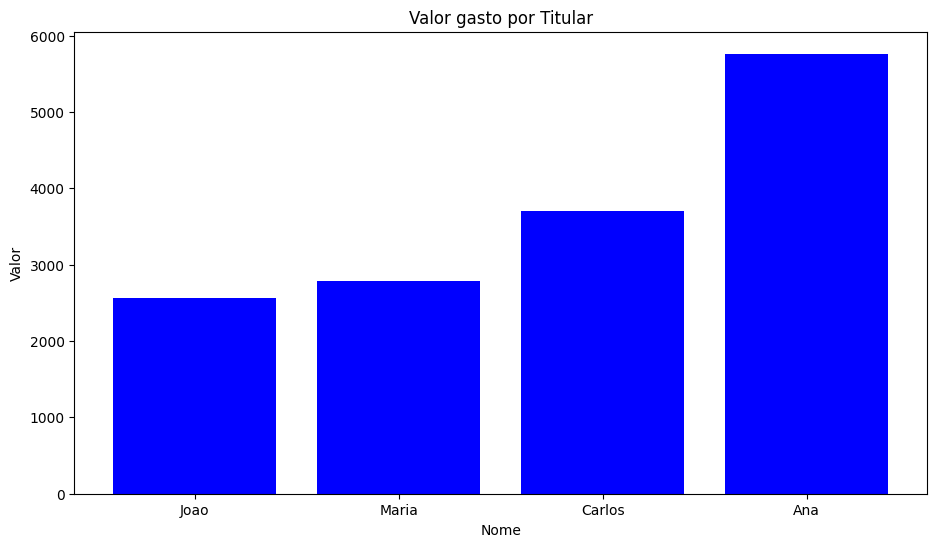

In [26]:
plt.figure(figsize=(11,6))
plt.bar(valor_gasto_por_titular ['Nome'],valor_gasto_por_titular['ValorCompra'], color = 'blue')
plt.title('Valor gasto por Titular')
plt.xlabel('Nome')
plt.ylabel('Valor')

<bound method _AxesBase.invert_yaxis of <Axes: xlabel='valor da compra', ylabel='categoria'>>

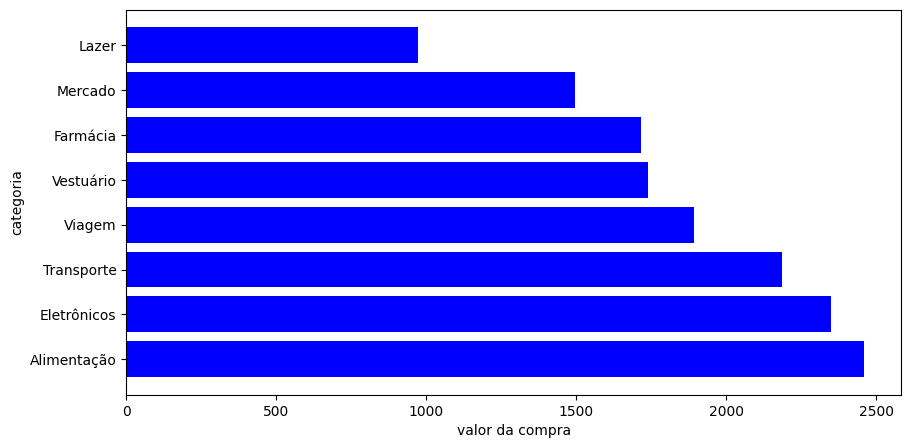

In [27]:
plt.figure(figsize=(10,5))
plt.barh(valor_gasto_por_categoria ['categoria'],valor_gasto_por_categoria['ValorCompra'], color = 'blue')
plt.xlabel('valor da compra')
plt.ylabel('categoria')
plt.gca().invert_yaxis


Text(0.5, 1.0, 'Distribuição dos Gastos por Titular')

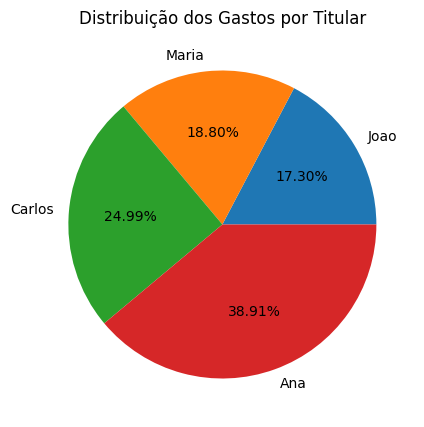

In [31]:
plt.figure(figsize=(5,5))
plt.pie(valor_gasto_por_titular['ValorCompra'], labels=valor_gasto_por_titular['Nome'],autopct='%1.2f%%')
plt.title('Distribuição dos Gastos por Titular')


In [35]:
gastos_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index()
print(gastos_por_dia.head())


  data_compra  ValorCompra
0  2024-04-01       455.73
1  2024-04-02       486.65
2  2024-04-03       153.34
3  2024-04-04       239.86
4  2024-04-05       569.11


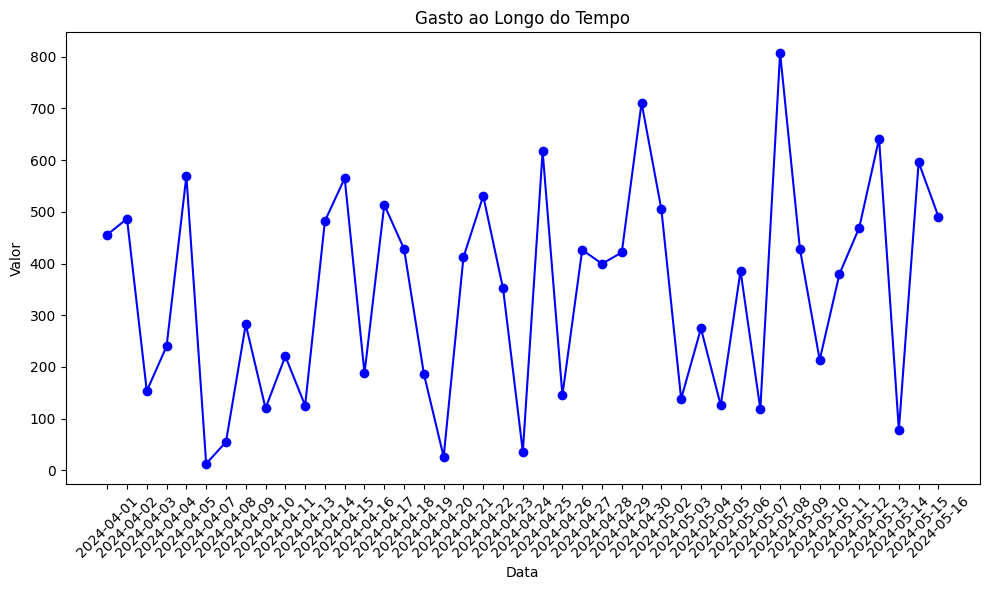

In [41]:
plt.figure(figsize=(10,6))
plt.plot(gastos_por_dia['data_compra'], gastos_por_dia['ValorCompra'], marker='o', linestyle='-', color='b')
plt.title('Gasto ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()
